# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [ ]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [ ]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

In [ ]:

from skimage.morphology import disk
from skimage.filters.rank import mean

plt.figure()
lena_im_mean=mean(lena_im,disk(1))
io.imshow(lena_im_mean)

plt.figure()
lena_im_mean1=mean(lena_im,disk(3))
io.imshow(lena_im_mean1)

plt.figure()
lena_im_mean2=mean(lena_im,disk(5))
io.imshow(lena_im_mean2)

plt.figure()
lena_im_mean3=mean(lena_im,disk(7))
io.imshow(lena_im_mean3)


### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

In [ ]:
def mean_filter(n):
    H= np.ones((n,n))*(1./(n*n))
    #H = H/np.sum(H)
    return H

from scipy.ndimage import filters
lena_conv=filters.convolve(lena_im,mean_filter(14))

print(lena_im)
print(mean_filter(14))


plt.figure
plt.imshow(lena_conv, cmap=plt.cm.gray)

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.


### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [ ]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

In [ ]:
leaves_im = io.imread(Path.__add__('leaves.jpg') ,as_grey=True)
plt.figure(0)
io.imshow(leaves_im)


leaves_ro=filters.roberts(leaves_im)
plt.figure(1)
io.imshow(leaves_ro)

leaves_pre=filters.prewitt(leaves_im)
plt.figure(2)
io.imshow(leaves_pre
          )
leaves_sob=filters.sobel(leaves_im)
plt.figure(3)
io.imshow(leaves_sob)
leaves_sch=filters.scharr(leaves_im)
plt.figure(4)
io.imshow(leaves_sch)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

In [ ]:
from scipy.ndimage import filters
leaves_lm=filters.laplace(leaves_im )

io.imshow(leaves_lm)


## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [ ]:
from skimage import util

In [ ]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

In [ ]:
from skimage import util
from skimage.morphology import disk
from skimage.filters.rank import mean


plt.figure(0)
io.imshow(lena_gaussian)
plt.title('Gaussian noise')    

plt.figure(1)
lena_gaussian1=mean(lena_gaussian,disk(1))
io.imshow(lena_gaussian1)

plt.figure(2)
lena_gaussian2=mean(lena_gaussian,disk(3))
io.imshow(lena_gaussian2)

plt.figure(3)
io.imshow(lena_sp)
plt.title('Salt and pepper noise')

plt.figure(4)
lena_sp1=mean(lena_sp,disk(1))
io.imshow(lena_sp1)


plt.figure(5)
lena_sp2=mean(lena_sp,disk(3))
io.imshow(lena_sp2)


plt.figure(6)
io.imshow(lena_speckle)
plt.title('Speckle noise')


plt.figure(7)
lena_speckle1=mean(lena_speckle,disk(1))
io.imshow(lena_sp1)


plt.figure(8)
lena_speckle2=mean(lena_speckle,disk(3))
io.imshow(lena_speckle2)

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

In [ ]:
from skimage.filters.rank import mean_percentile
#disk 1
avg = mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on gaussian noise disk 1')

avg = mean_percentile(lena_sp,disk(1),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on salt&pepper noise disk 1')

avg = mean_percentile(lena_speckle,disk(1),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on speckle noise disk 1')

#disk 3
avg_1 = mean_percentile(lena_gaussian,disk(3),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg_1)
plt.title('Mean percentile filter on gaussian noise disk 3')

avg = mean_percentile(lena_sp,disk(3),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on salt&pepper noise disk 3')

avg = mean_percentile(lena_speckle,disk(3),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on salt&pepper noise disk 3')

** median filter: **

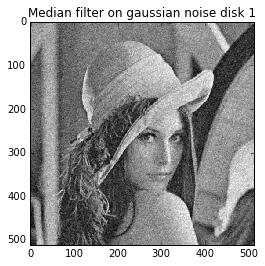

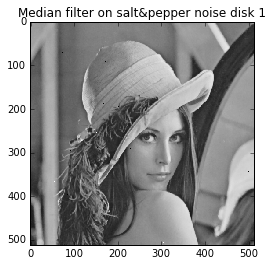

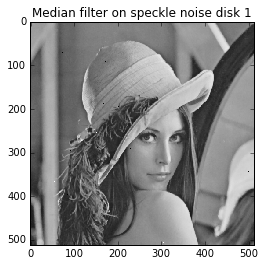

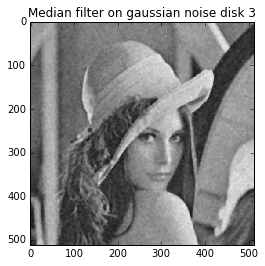

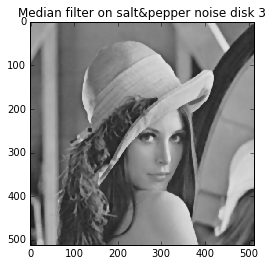

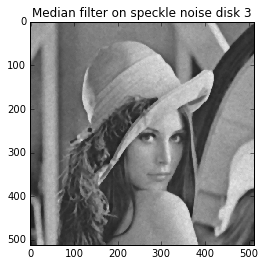

In [26]:
from skimage.filters.rank import median
#disk 1
avg_v = median(lena_gaussian,disk(1))
plt.figure()
io.imshow(avg_v)
plt.title('Median filter on gaussian noise disk 1')

avg_v = median(lena_sp,disk(1))
plt.figure()
io.imshow(avg_v)
plt.title('Median filter on salt&pepper noise disk 1')

avg_v = median(lena_sp,disk(1))
plt.figure()
io.imshow(avg_v)
plt.title('Median filter on speckle noise disk 1')

#disk 3
avg_va = median(lena_gaussian,disk(3))
plt.figure()
io.imshow(avg_va)
plt.title('Median filter on gaussian noise disk 3')

avg_va = median(lena_sp,disk(3))
plt.figure()
io.imshow(avg_va)
plt.title('Median filter on salt&pepper noise disk 3')

avg_va = median(lena_speckle,disk(3))
plt.figure()
io.imshow(avg_va)
plt.title('Median filter on speckle noise disk 3')

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

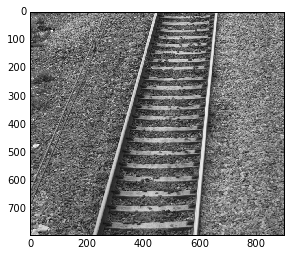

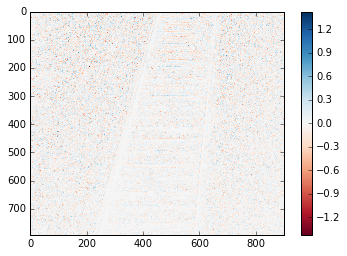

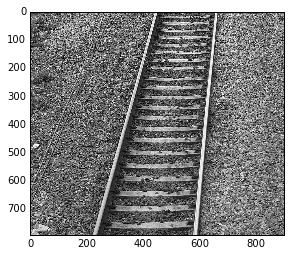

In [30]:
from skimage.color import rgb2gray
from scipy import ndimage
Path = './images/'
rail_im = io.imread(Path.__add__('railway.jpg'))
rail_im = rgb2gray(rail_im)
rail_im = img_as_float(rail_im)
plt.figure()
io.imshow(rail_im)

laplace = ndimage.filters.laplace(rail_im)
plt.figure()
io.imshow(laplace)

sharp = rail_im - laplace
plt.figure()
plt.imshow(sharp,cmap=cm.gray,vmin = 0, vmax=1)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

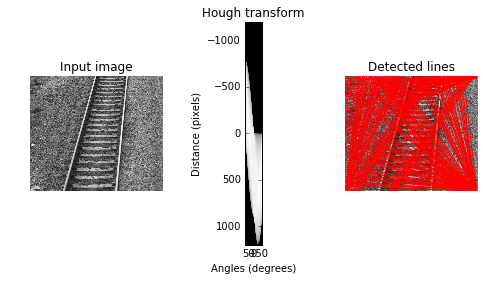

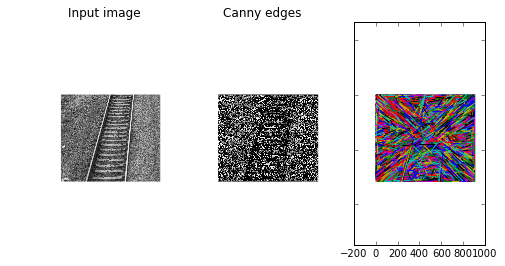

In [31]:
from skimage.transform import probabilistic_hough_line
from skimage.transform import hough_line_peaks
from skimage.transform import hough_line
from skimage.feature import canny
h,theta,d = hough_line(rail_im)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4))

ax1.imshow(rail_im, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

ax2.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)
ax2.set_title('Hough transform')
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.axis('image')


ax3.imshow(rail_im, cmap=plt.cm.gray)
rows, cols = rail_im.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, cols), (y0, y1), '-r')
ax3.axis((0, cols, rows, 0))
ax3.set_title('Detected lines')
ax3.set_axis_off()

a = canny(rail_im)


d = probabilistic_hough_line(a)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4), sharex=True, sharey=True)

ax1.imshow(rail_im, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(a, cmap=plt.cm.gray)
ax2.set_title('Canny edges')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')

ax3.imshow(a * 0)

for line in d:
    p0, p1 = line
    ax3.plot((p0[0], p1[0]), (p0[1], p1[1]))